## Introduction:

   **The sinking of the RMS Titanic on April 15, 1912, remains one of the most infamous maritime disasters in history. The tragic event claimed the lives of over 1,500 passengers and crew members, highlighting the vulnerabilities and shortcomings of the safety measures in place at the time. In recent years, the Titanic dataset has become a popular resource for data analysis and machine learning enthusiasts. This dataset, which contains information about passengers onboard, has been widely used to explore patterns, predict survival outcomes, and gain insights into the factors that influenced survival rates.**

## Domain Analysis:

**The Titanic dataset is a rich source of information about the passengers who were aboard the ill-fated ship. It includes details such as the passengers' names, ages, genders, ticket classes, embarkation points, and whether they survived or perished. This dataset provides a snapshot of the socio-economic and demographic characteristics of the passengers, offering researchers an opportunity to delve into the dynamics of survival based on various factors. The domain analysis involves understanding the context of the dataset, exploring the relationships between different variables, and extracting meaningful patterns that can contribute to a deeper understanding of the events surrounding the Titanic disaster.**

## Problem Statement:

**The problem at hand is to analyze the Titanic dataset and develop predictive models to determine the likelihood of a passenger surviving the disaster. This involves exploring the relationships between various features in the dataset and building a model that can accurately predict whether a given passenger survived or not. Additionally, the analysis aims to identify key factors that played a significant role in determining survival outcomes, shedding light on the socio-economic and demographic aspects that influenced the chances of survival during this historic tragedy. Through data-driven insights, the goal is to contribute to a better understanding of the factors that affected survival rates on the Titanic and to showcase the potential applications of data analysis in historical events.**

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

## Basic Checks

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
int_var = ['Survived', 'Pclass','Age', 'SibSp','Parch','Fare']
obj_var = ['Sex','Cabin', 'Embarked','Ticket']

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Insights -

1. There are 12 columns and 418 rows in the dataset.
2. Columns named 'Age','Fare','Cabin' contains null values.

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
data.duplicated().sum()

0

- Insights
1. There are no constant columns.
2. No duplicate values.

## Exploratory Data Analysis

In [12]:
!pip install SWEETVIZ


Defaulting to user installation because normal site-packages is not writeable


In [13]:
import sweetviz as sv 
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


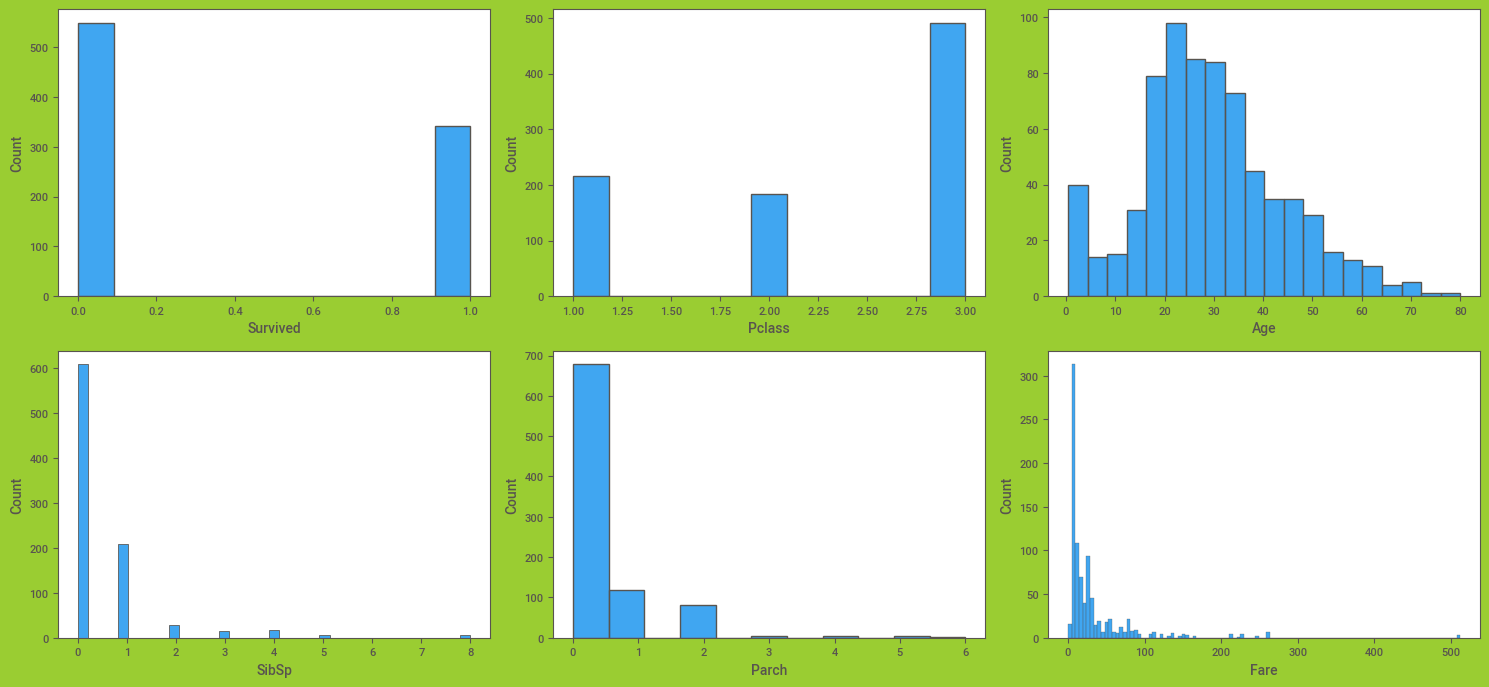

In [14]:
plt.figure(figsize=(15,10),facecolor='yellowgreen')
plotnum=1
for i in int_var:
    plt.subplot(3,3,plotnum)
    sns.histplot(data[i])
    plotnum+=1
plt.tight_layout()
plt.show()
    

**Insights**

- Almost 60% of the passengers died in the accident.
- Most of the passengers were travelling in Pclass 3.
- Majority of the passengers falls between the age group 15 to 50.
- Fare of mojority passengers lies between 0 to 100.


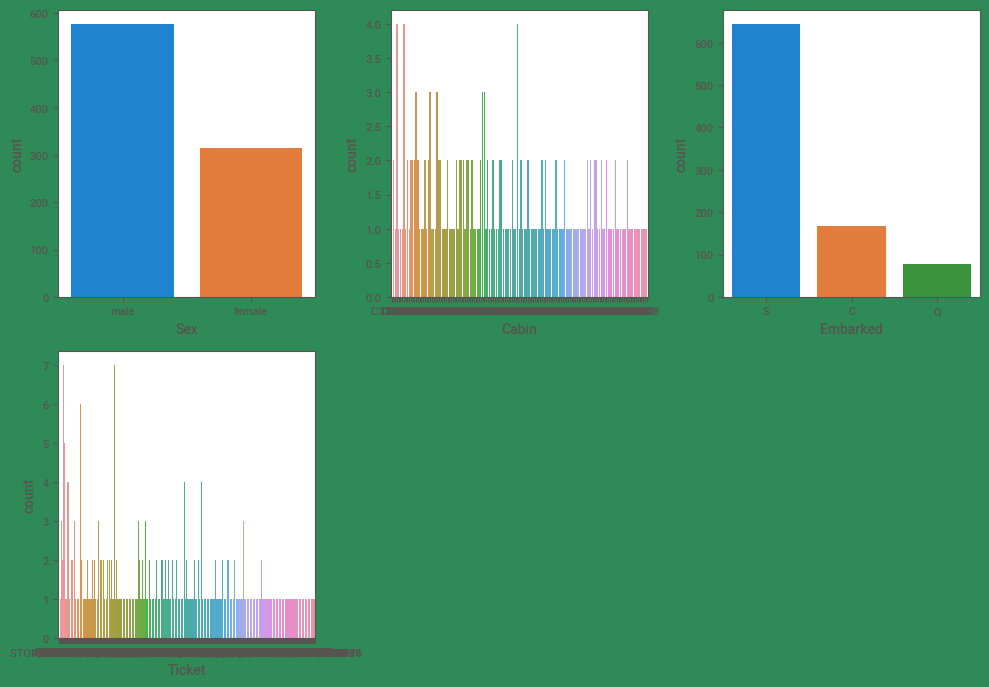

In [15]:
plt.figure(figsize=(10,10),facecolor='seagreen')
plotnum=1
for i in obj_var:
    plt.subplot(3,3,plotnum)
    sns.countplot(x=data[i])
    plotnum+=1
plt.tight_layout()
plt.show()

**Insights**
- 65% of the passengers were male and rest 35% were female.

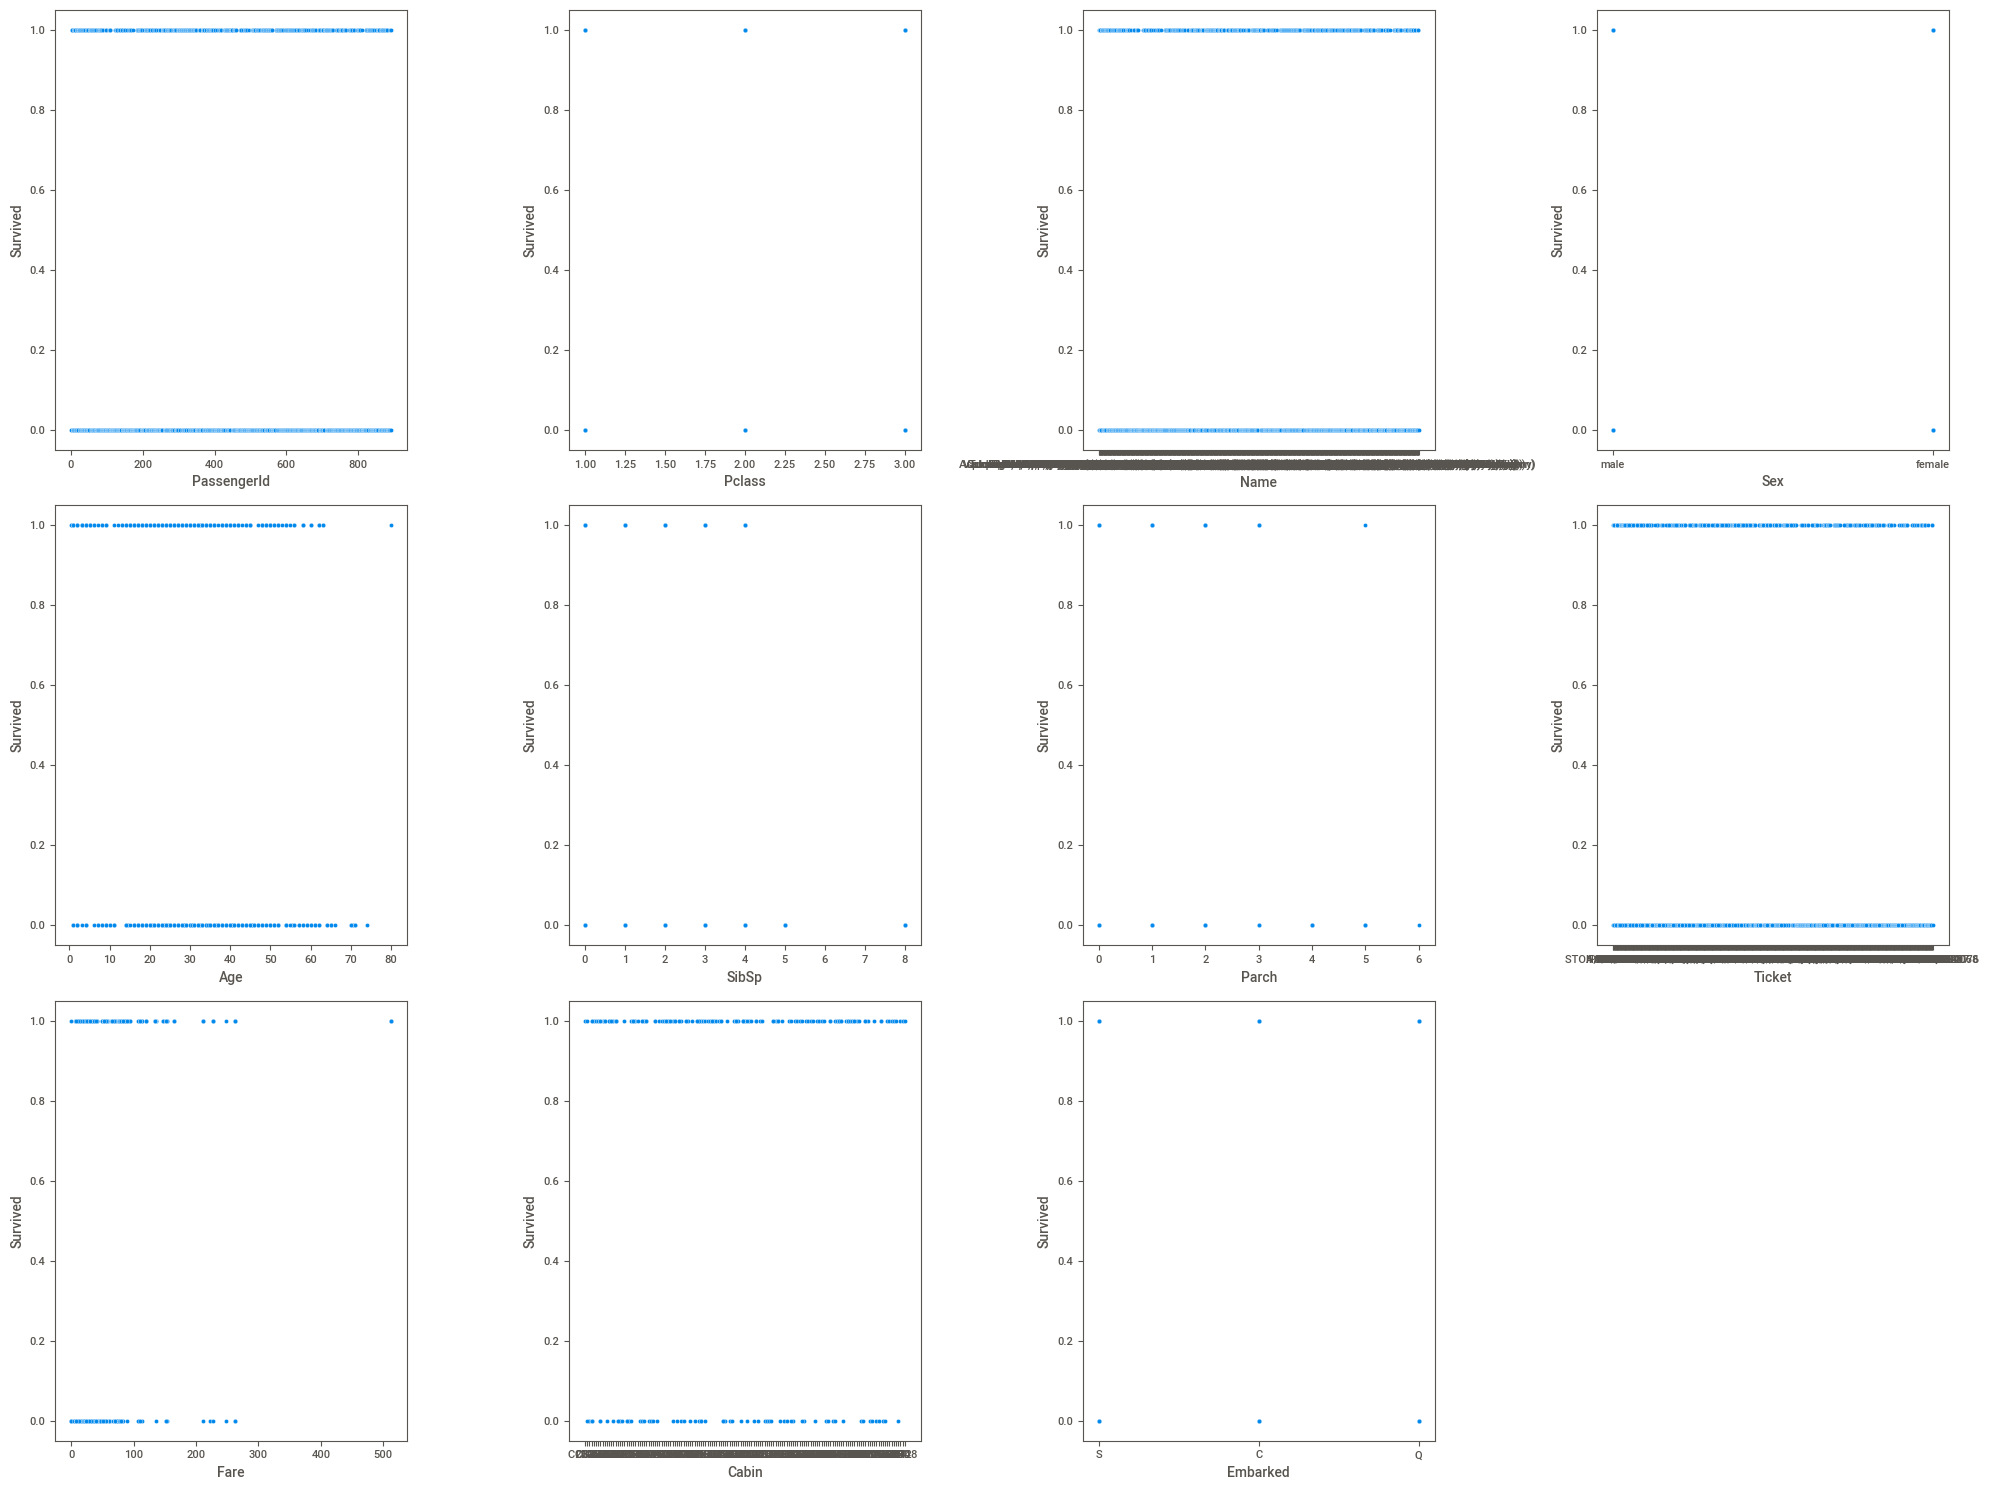

In [16]:
# Bivariate 
plt.figure(figsize=(20,15),facecolor='white')
plotnum=1
for i in data.drop('Survived',axis=1).columns:
    plt.subplot(3,4,plotnum)
    sns.scatterplot(x=data[i],y=data['Survived'])
    plotnum+=1
plt.tight_layout()
plt.show()

**Insights**
- No such strong correlation were found.

## Data Preprocessing

### Handling null values

In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [19]:
data.loc[data['Age'].isnull(),'Age']=data['Age'].median()

In [20]:
data.loc[data['Fare'].isnull(),'Fare']=data['Fare'].median()

In [21]:
data.loc[data['Cabin'].isnull(),'Cabin']='B57'

In [22]:
data.loc[data['Embarked'].isnull(),'Embarked']=1.0

In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Handling outliers

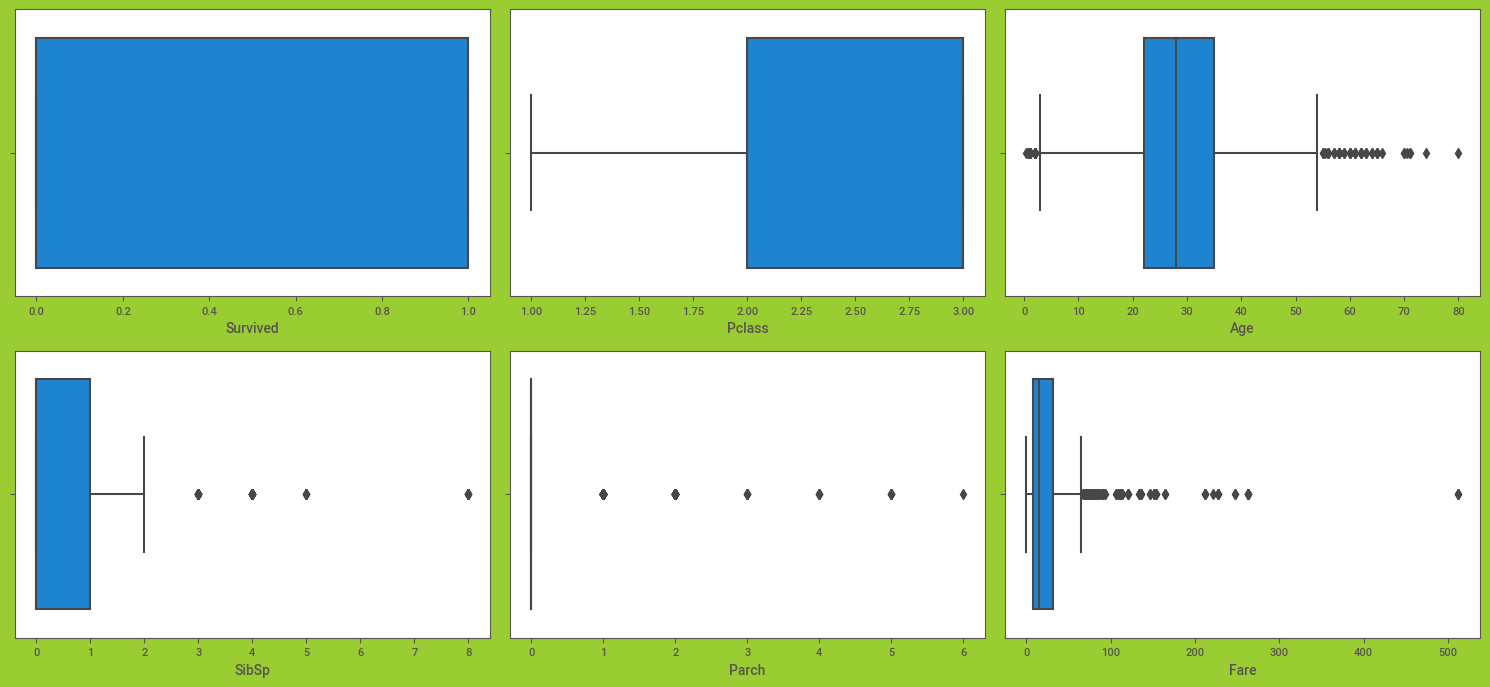

In [24]:
plt.figure(figsize=(15,10),facecolor='yellowgreen')
plotnum=1
for i in int_var:
    plt.subplot(3,3,plotnum)
    sns.boxplot(x=data[i])
    plotnum+=1
plt.tight_layout()
plt.show()

In [25]:
data.loc[data['Fare']>100,'Fare']=14.4542

In [26]:
data.loc[data['Age']>70,'Age']=data['Age'].median()
data.loc[data['Age']<5,'Age']=data['Age'].median()

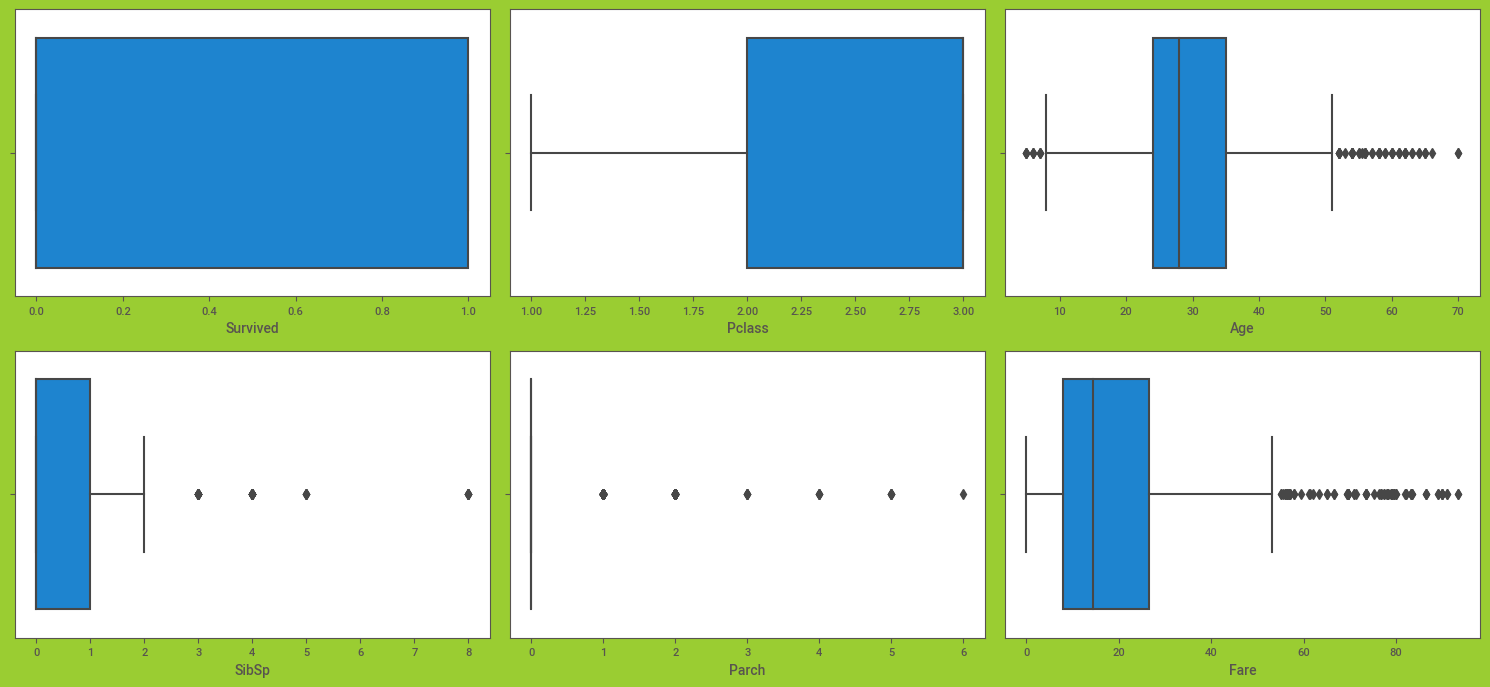

In [27]:
plt.figure(figsize=(15,10),facecolor='yellowgreen')
plotnum=1
for i in int_var:
    plt.subplot(3,3,plotnum)
    sns.boxplot(x=data[i])
    plotnum+=1
plt.tight_layout()
plt.show()

### Converting categorical data

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
data.Sex = data.Sex.map({'male':0,'female':1})

In [30]:
data.Embarked = data.Embarked.map({'Q':0,'S':1,'C':2})

In [31]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data.Cabin=lb.fit_transform(data.Cabin)

In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,35,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,82,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,35,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,56,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,35,1.0


In [33]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
# droping unwanted columns
data = data.drop(['PassengerId','Name','Ticket'],axis=1)

In [35]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,35,1.0
1,1,1,1,38.0,1,0,71.2833,82,2.0
2,1,3,1,26.0,0,0,7.9250,35,1.0
3,1,1,1,35.0,1,0,53.1000,56,1.0
4,0,3,0,35.0,0,0,8.0500,35,1.0


## Feature Engg

In [36]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,0.543351,-0.006100,-0.035322,0.081629,0.246471,0.217712,0.126753
Pclass,-0.338481,1.000000,-0.131900,-0.352066,0.083081,0.018443,-0.553134,-0.362950,-0.307324
Sex,0.543351,-0.131900,1.000000,-0.062739,0.114631,0.245489,0.171538,0.118588,0.023175
Age,-0.006100,-0.352066,-0.062739,1.000000,-0.150927,-0.062579,0.179571,0.163790,0.049710
SibSp,-0.035322,0.083081,0.114631,-0.150927,1.000000,0.414838,0.332266,-0.012546,-0.031095
Parch,0.081629,0.018443,0.245489,-0.062579,0.414838,1.000000,0.197221,0.027560,0.035756
Fare,0.246471,-0.553134,0.171538,0.179571,0.332266,0.197221,1.000000,0.265588,0.191103
Cabin,0.217712,-0.362950,0.118588,0.163790,-0.012546,0.027560,0.265588,1.000000,0.063600
Embarked,0.126753,-0.307324,0.023175,0.049710,-0.031095,0.035756,0.191103,0.063600,1.000000


<Axes: >

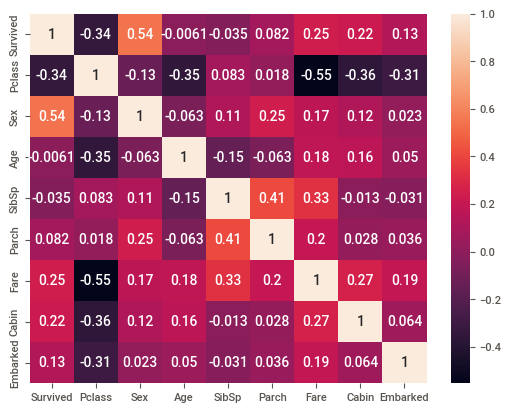

In [37]:
sns.heatmap(data.corr(),annot=True)

## Splitting Data

In [38]:
x=data.drop('Survived',axis=1)
y=data.Survived

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [46]:
x_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [47]:
x_train.loc[x_train['Embarked'].isnull()== True,'Embarked']=1.0

# Logistic Regression

## Model Creation

In [49]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
model=LR.fit(x_train,y_train)
model

LogisticRegression()

In [50]:
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

## Model Evaluation

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,f1_score,precision_score

In [52]:
acc_lr = accuracy_score(y_test,y_pred)
rec_lr = recall_score(y_test,y_pred)
prec_lr = precision_score(y_test,y_pred)
f1_lr = f1_score(y_test,y_pred)
print("Accuracy Score : ",acc_lr)
print("Recall Score : ",rec_lr)
print("Precision Score : ",prec_lr)
print("f1 Score : ",f1_lr)

Accuracy Score :  0.7821229050279329
Recall Score :  0.6774193548387096
Precision Score :  0.6885245901639344
f1 Score :  0.6829268292682927


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       117
           1       0.69      0.68      0.68        62

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



# KNN

### Model Creation

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN = KNN.fit(x_train,y_train)
model_KNN

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_knn = model_KNN.predict(x_test)

### Model Evaluation

In [57]:
acc_knn = accuracy_score(y_test,y_knn)
rec_knn = recall_score(y_test,y_knn)
prec_knn = precision_score(y_test,y_knn)
f1_knn = f1_score(y_test,y_knn)
print("Accuracy Score : ",acc_knn)
print("Recall Score : ",rec_knn)
print("Precision Score : ",prec_knn)
print("f1 Score : ",f1_knn)

Accuracy Score :  0.6927374301675978
Recall Score :  0.5806451612903226
Precision Score :  0.5538461538461539
f1 Score :  0.5669291338582677


In [58]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       117
           1       0.55      0.58      0.57        62

    accuracy                           0.69       179
   macro avg       0.66      0.67      0.66       179
weighted avg       0.70      0.69      0.69       179



# Decision Tree

### Model Creation

In [59]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
model = dc.fit(x_train,y_train)
model

DecisionTreeClassifier()

In [60]:
y_dc = dc.predict(x_test)

### Model Evaluation 

In [61]:
acc_dc = accuracy_score(y_test,y_dc)
rec_dc = recall_score(y_test,y_dc)
prec_dc = precision_score(y_test,y_dc)
f1_dc = f1_score(y_test,y_dc)
print("Accuracy Score : ",acc_dc)
print("Recall Score : ",rec_dc)
print("Precision Score : ",prec_dc)
print("f1 Score : ",f1_dc)

Accuracy Score :  0.7988826815642458
Recall Score :  0.7903225806451613
Precision Score :  0.6805555555555556
f1 Score :  0.7313432835820894


In [62]:
print(classification_report(y_dc,y_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       107
           1       0.79      0.68      0.73        72

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



## Hyperparameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'criterion':['gini','entropy'],
             'splitter' : ['best','random'],
             'min_samples_leaf' : [2,5,8,10,15],
             'min_samples_split' : [3,7,9,13],
             'max_depth' : [2,4,7,6]}

In [65]:
dtr = DecisionTreeClassifier(random_state=34)
grid_cv = GridSearchCV(dtr,param_grid,scoring='f1',verbose=3,cv=4,n_jobs=-1)
grid_cv.fit(x_train,y_train)
best_params = grid_cv.best_params_
print('Best Parameters')
print(best_params)

Fitting 4 folds for each of 320 candidates, totalling 1280 fits
Best Parameters
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 3, 'splitter': 'best'}


In [98]:
model_dtr_ht = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, min_samples_leaf= 8, min_samples_split= 3, splitter='best')
model_dtr_ht.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       min_samples_split=3)

In [99]:
y_pred_dtr_ht = model_dtr_ht.predict(x_test)

## Evaluation

In [100]:
acc_dct = accuracy_score(y_test,y_pred_dtr_ht)
rec_dct = recall_score(y_test,y_pred_dtr_ht)
prec_dct = precision_score(y_test,y_pred_dtr_ht)
f1_dct = f1_score(y_test,y_pred_dtr_ht)
print("Accuracy Score : ",acc_dct)
print("Recall Score : ",rec_dct)
print("Precision Score : ",prec_dct)
print("f1 Score : ",f1_dct)

Accuracy Score :  0.770949720670391
Recall Score :  0.6612903225806451
Precision Score :  0.6721311475409836
f1 Score :  0.6666666666666666


In [101]:
print(classification_report(y_test,y_pred_dtr_ht))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       117
           1       0.67      0.66      0.67        62

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



# Random Forest 

### Model Creation

In [70]:
from sklearn.ensemble import RandomForestClassifier
Rc = RandomForestClassifier()
model_rc = Rc.fit(x_train,y_train)
model_rc

RandomForestClassifier()

In [71]:
y_rc = Rc.predict(x_test)

### Model Evaluation

In [72]:
acc_rc = accuracy_score(y_test,y_rc)
rec_rc = recall_score(y_test,y_rc)
prec_rc = precision_score(y_test,y_rc)
f1_rc = f1_score(y_test,y_rc)
print("Accuracy Score : ",acc_rc)
print("Recall Score : ",rec_rc)
print("Precision Score : ",prec_rc)
print("f1 Score : ",f1_rc)

Accuracy Score :  0.7988826815642458
Recall Score :  0.7419354838709677
Precision Score :  0.696969696969697
f1 Score :  0.71875


In [73]:
print(classification_report(y_test,y_rc))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       117
           1       0.70      0.74      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.80      0.80       179



## HyperParameter Tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
n_estimators = [200,250,270,310,350,390]
max_features = ['log2','sqrt']
max_depth = [10,20,30,40,50]
min_samples_split = [2,5,7,9,14]
min_samples_leaf = [2,5,6,8,10]
bootstrap = [True,False]

In [76]:
random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

In [77]:
model_rf_ht = RandomForestClassifier(random_state=34)
rfr_cv = RandomizedSearchCV(estimator=model_rf_ht,scoring='f1',param_distributions = random_grid,n_iter=100,cv=3,verbose=3)
rfr_cv.fit(x_train,y_train)
best_param = rfr_cv.best_params_
print('Best Parameters')
print(best_param)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=270;, score=0.737 total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=270;, score=0.674 total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=270;, score=0.739 total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=250;, score=0.714 total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=250;, score=0.694 total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=250;, score=0.765 total time=   0.9s
[CV 1/3] END 

[CV 3/3] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=270;, score=0.769 total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=270;, score=0.714 total time=   0.9s
[CV 2/3] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=270;, score=0.694 total time=   0.9s
[CV 3/3] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=14, n_estimators=270;, score=0.750 total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=250;, score=0.721 total time=   0.9s
[CV 2/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=250;, score=0.667 total time=   0.9s
[CV 3/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_

[CV 3/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=390;, score=0.789 total time=   1.3s
[CV 1/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=250;, score=0.728 total time=   0.8s
[CV 2/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=250;, score=0.663 total time=   0.7s
[CV 3/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=250;, score=0.795 total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=270;, score=0.724 total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=270;, score=0.686 total time=   0.9s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf

[CV 3/3] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=9, n_estimators=310;, score=0.789 total time=   1.4s
[CV 1/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=390;, score=0.728 total time=   1.5s
[CV 2/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=390;, score=0.670 total time=   1.5s
[CV 3/3] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=390;, score=0.786 total time=   1.6s
[CV 1/3] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=200;, score=0.717 total time=   0.6s
[CV 2/3] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=200;, score=0.670 total time=   0.5s
[CV 3/3] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=

[CV 3/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=250;, score=0.757 total time=   0.8s
[CV 1/3] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=9, n_estimators=250;, score=0.727 total time=   0.7s
[CV 2/3] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=9, n_estimators=250;, score=0.678 total time=   0.7s
[CV 3/3] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=9, n_estimators=250;, score=0.764 total time=   0.7s
[CV 1/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=310;, score=0.730 total time=   0.8s
[CV 2/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=310;, score=0.682 total time=   0.8s
[CV 3/3] END bootstrap=False, max_depth=10, max_features=sqrt, min_sam

[CV 3/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=200;, score=0.754 total time=   0.6s
[CV 1/3] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=390;, score=0.734 total time=   1.5s
[CV 2/3] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=390;, score=0.678 total time=   1.5s
[CV 3/3] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=390;, score=0.781 total time=   1.6s
[CV 1/3] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=250;, score=0.728 total time=   0.8s
[CV 2/3] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=250;, score=0.663 total time=   0.8s
[CV 3/3] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_le

In [94]:
model_rfr_ht = RandomForestClassifier(n_estimators= 250, min_samples_split= 14, min_samples_leaf= 2, max_features= 'log2', max_depth= 50, bootstrap= False)
model_rfr_ht.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='log2',
                       min_samples_leaf=2, min_samples_split=14,
                       n_estimators=250)

In [95]:
y_pred_rfr_ht = model_rfr_ht.predict(x_test)

### Evaluation

In [96]:
acc_rfr = accuracy_score(y_test,y_pred_rfr_ht)
rec_rfr = recall_score(y_test,y_pred_rfr_ht)
prec_rfr = precision_score(y_test,y_pred_rfr_ht)
f1_rfr = f1_score(y_test,y_pred_rfr_ht)
print("Accuracy Score : ",acc_rfr)
print("Recall Score : ",rec_rfr)
print("Precision Score : ",prec_rfr)
print("f1 Score : ",f1_rfr)

Accuracy Score :  0.8212290502793296
Recall Score :  0.7580645161290323
Precision Score :  0.734375
f1 Score :  0.7460317460317459


In [97]:
print(classification_report(y_test,y_pred_rfr_ht))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       117
           1       0.73      0.76      0.75        62

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



## XGBoost

### Model Creation

In [82]:
import xgboost

In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_xgb = xgb.fit(x_train,y_train)
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
y_xgb = xgb.predict(x_test)

### Model Evaluation

In [85]:
acc_xgb = accuracy_score(y_test,y_xgb)
rec_xgb = recall_score(y_test,y_xgb)
prec_xgb = precision_score(y_test,y_xgb)
f1_xgb = f1_score(y_test,y_xgb)
print("Accuracy Score : ",acc_xgb)
print("Recall Score : ",rec_xgb)
print("Precision Score : ",prec_xgb)
print("f1 Score : ",f1_xgb)

Accuracy Score :  0.8324022346368715
Recall Score :  0.7580645161290323
Precision Score :  0.7580645161290323
f1 Score :  0.7580645161290323


In [86]:
print(classification_report(y_test,y_xgb))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       117
           1       0.76      0.76      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



## Hyperparameter Tuning

In [87]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma' : [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
             'learning_rate' : [0.01,0.03,0.06,0.1,0.15,0.2,0.25,0.31,0.4,0.5,0.6,0.7],
             'max_depth' : [5,6,7,8,9,10,11,12,13,14],
             'n_estimators' : [50,65,80,100,115,130,150],
             'reg_alpha' : [0,0.1,0.2,0.3,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
             'reg_lambda' : [0,0.1,0.2,0.3,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB = XGBClassifier(random_state=42,verbosity = 0,silent=0)
rcv = RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions = param_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)


rcv.fit(x_train,y_train)
cv_best_params = rcv.best_params_
print('Best Parameters')
print(cv_best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters
{'reg_lambda': 0.4, 'reg_alpha': 0.3, 'n_estimators': 130, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 1.6}


In [102]:
XGB_ht = XGBClassifier(reg_lambda= 0.4, reg_alpha= 0.3, n_estimators= 130, max_depth= 8, learning_rate= 0.2, gamma= 1.6)
XGB_ht.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.6, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=130, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [103]:
y_pred_xgb_ht = XGB_ht.predict(x_test)

## Evaluation

In [104]:
acc_xgb_ht = accuracy_score(y_test,y_pred_xgb_ht)
rec_xgb_ht = recall_score(y_test,y_pred_xgb_ht)
prec_xgb_ht = precision_score(y_test,y_pred_xgb_ht)
f1_xgb_ht = f1_score(y_test,y_pred_xgb_ht)
print("Accuracy Score : ",acc_xgb_ht)
print("Recall Score : ",rec_xgb_ht)
print("Precision Score : ",prec_xgb_ht)
print("f1 Score : ",f1_xgb_ht)

Accuracy Score :  0.7988826815642458
Recall Score :  0.7096774193548387
Precision Score :  0.7096774193548387
f1 Score :  0.7096774193548389


In [105]:
print(classification_report(y_test,y_pred_xgb_ht))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.71      0.71        62

    accuracy                           0.80       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



## Final Report

In [106]:
scores = [acc_lr,acc_knn,acc_dc,acc_rfr,acc_xgb]
algorithms = ['Logistic Regression','KNN','Decision Tree','Random Forest','XGBoost']

for i in range(len(scores)):
    print('Accuracy score in' + ' ' + algorithms[i] + ' ' + 'is' + ' ' + f'{scores[i]*100}' + '%')

Accuracy score in Logistic Regression is 78.2122905027933%
Accuracy score in KNN is 69.27374301675978%
Accuracy score in Decision Tree is 79.88826815642457%
Accuracy score in Random Forest is 82.12290502793296%
Accuracy score in XGBoost is 83.24022346368714%


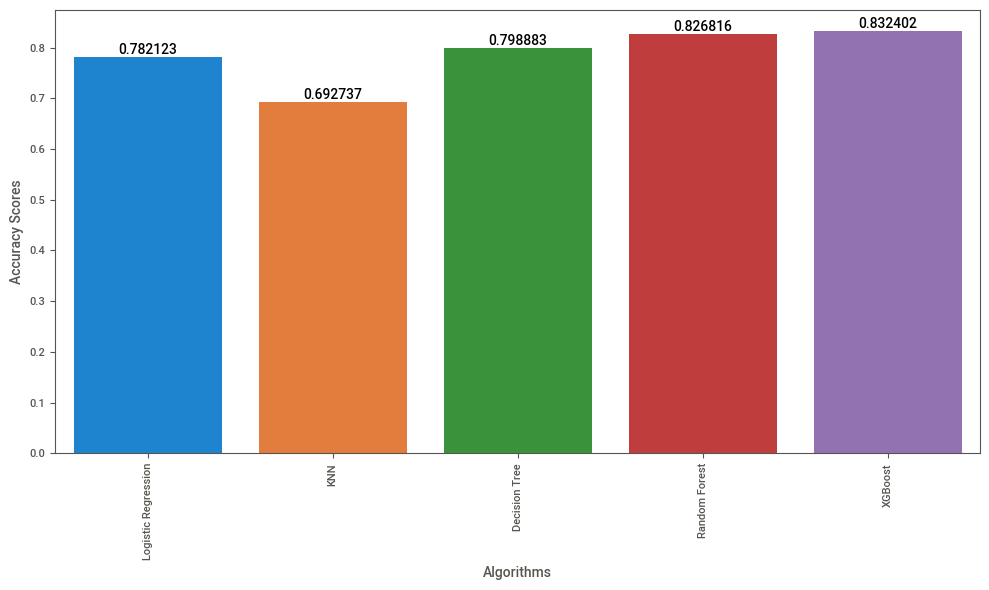

In [93]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel('Accuracy Scores')
ax = sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary

- After trying various model, XGBoost came out to be the best model with 83% accuracy.

## Conclusion

    
    In conclusion, our machine learning model utilizing XGBoost has yielded best performance in predicting the survival of passengers, achieving an accuracy score of 83%. This score indicates that approximately 83% of the variability in the target variable, is explained by the features included in the model.

## Challenges Faced in Data and Techniques

**Data Quality and Preprocessing**


    The data was incomplete and hadling them is the initial challenge faced. Cleaning and preprocessing the data involves    handling null values, outliers and ensuring consistency in data formats.
    

**Feature Engineering**


    Deriving meaningful features from raw data presents a significant challenge. Techniques for feature selection and extraction play a crucial role in enhancing model performance by refining the input data, ensuring its relevance,and improving the model's ability to find out essential patterns and relationships.
    

**Categorical Variables**


    Encoding the categorical type columns like engine-type, fuel-type, etc to make them suitable for machine Learning model is what the challenge we faced. 

## Techniques Used in Automobile import price Prediction:

   **Model Selection:**

     Choosing the right machine learning algorithm or ensemble of algorithms can be challenging. Common choices
     for regression tasks like flight fare prediction include XGBoost, Random Forest, and Linear Regression.
    
   **Cross-Validation:**

      Cross-validation is used to assess the model's performance and ensure it generalizes well to unseen data. 
      Common techniques include k-fold cross-validation.
           
   **Hyperparameter Tuning:**

     Hyperparameter tuning using techniques like grid search or random search helps optimize model parameters 
     to achieve the best performance.
          
   **Ensemble Techniques:**

     Ensemble methods such as stacking or blending multiple models (e.g., XGBoost, Random Forest) can improve predictive accuracy.
     
   **Feature Engineering for Categorical Data:**

     Techniques such as one-hot encoding, label encoding, or target encoding are used to convert 
     categorical variables into a suitable format for modeling.